# LIFE EXPECTANCY PREDICTION FOR WHO

__1) Importing basic libraries to start with__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

__2) Loading the data__

In [2]:
df=pd.read_csv("1_Data_Project_LifeExpectancy_LinearRegression.csv")
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

__3) Understanding the data__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

__4) Data Pre-Processing__

Here, we will find the number of null values in the data. And for that we will use the following code:-

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
num_col=df.select_dtypes(include=np.number).columns
print("Numerical columns=",num_col)

print("\n")
cat_col=df.select_dtypes(exclude=np.number).columns
print("Categorical columns=",cat_col)

Numerical columns= Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


Categorical columns= Index(['Country', 'Status'], dtype='object')


In order to remove unnecessary spacing in the name of the columns,the following code has been used:-

In [7]:
df=df.rename(columns=lambda x: x.strip())

Importing Label encoder from sklearn.preprocessing in order to convert the categorical variables to numerical variables in the column "Status".

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder=LabelEncoder()

In [10]:
df["Status"]=label_encoder.fit_transform(df["Status"])
df.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       1             65.0            263.0             62   
1  Afghanistan  2014       1             59.9            271.0             64   
2  Afghanistan  2013       1             59.9            268.0             66   
3  Afghanistan  2012       1             59.5            272.0             69   
4  Afghanistan  2011       1             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles  ...  Polio  \
0     0.01               71.279624         65.0     1154  ...    6.0   
1     0.01               73.523582         62.0      492  ...   58.0   
2     0.01               73.219243         64.0      430  ...   62.0   
3     0.01               78.184215         67.0     2787  ...   67.0   
4     0.01                7.097109         68.0     3013  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

Now, there are many approaches to deal with null values in the data.

1) Firstly, we can remove the null values in the data.

2) Secondly, we can fill the null values in the data by mean or whatever feels necessary for the data.

3) Thirdly, we can use the algorithm which supports NA values.

Here, I am using the second step, i.e. Filling the null values in the data by mean.

In [11]:
for i in df.columns.drop(["Country","Status"]):
    df[i].fillna(df[i].mean(),inplace=True)

In [12]:
df.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       1             65.0            263.0             62   
1  Afghanistan  2014       1             59.9            271.0             64   
2  Afghanistan  2013       1             59.9            268.0             66   
3  Afghanistan  2012       1             59.5            272.0             69   
4  Afghanistan  2011       1             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles  ...  Polio  \
0     0.01               71.279624         65.0     1154  ...    6.0   
1     0.01               73.523582         62.0      492  ...   58.0   
2     0.01               73.219243         64.0      430  ...   62.0   
3     0.01               78.184215         67.0     2787  ...   67.0   
4     0.01                7.097109         68.0     3013  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

Now, we check whether there are null values are not.

In [13]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

__5) Exploratory Data Analysis__

Text(0.5, 1.0, 'Life Expectancy Distribution Boxplot')

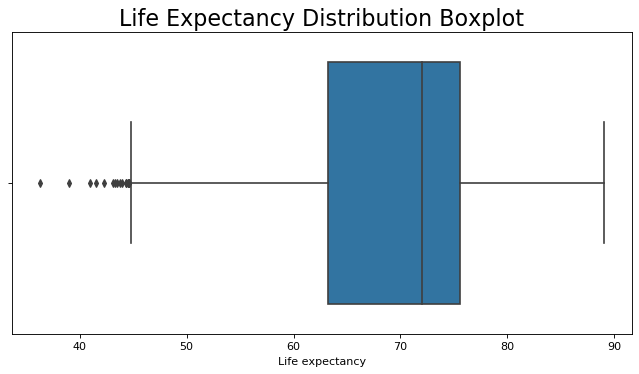

In [14]:
plt.figure(figsize=(10,5),dpi=80)
sns.boxplot(df["Life expectancy"])
plt.title("Life Expectancy Distribution Boxplot",fontsize=20)

Text(0.5, 1.0, 'Life Expectancy Distibution Distplot')

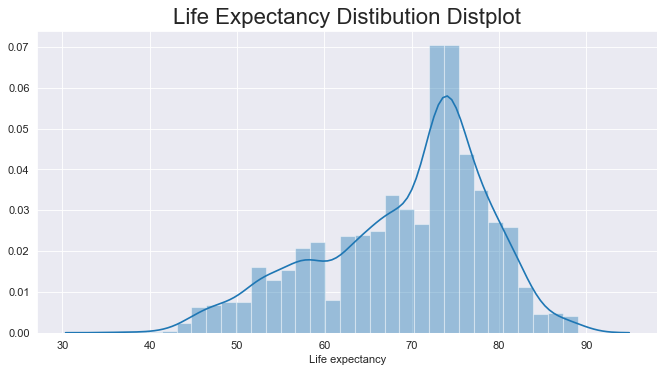

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5),dpi=80)
sns.distplot(df["Life expectancy"])
plt.title("Life Expectancy Distibution Distplot",fontsize=20)

The y-variable is having very few outliers and is almost normaly distributed. So, the assumption of linear regression holds true.

Text(0.5, 1, 'Correlation Heatmap')

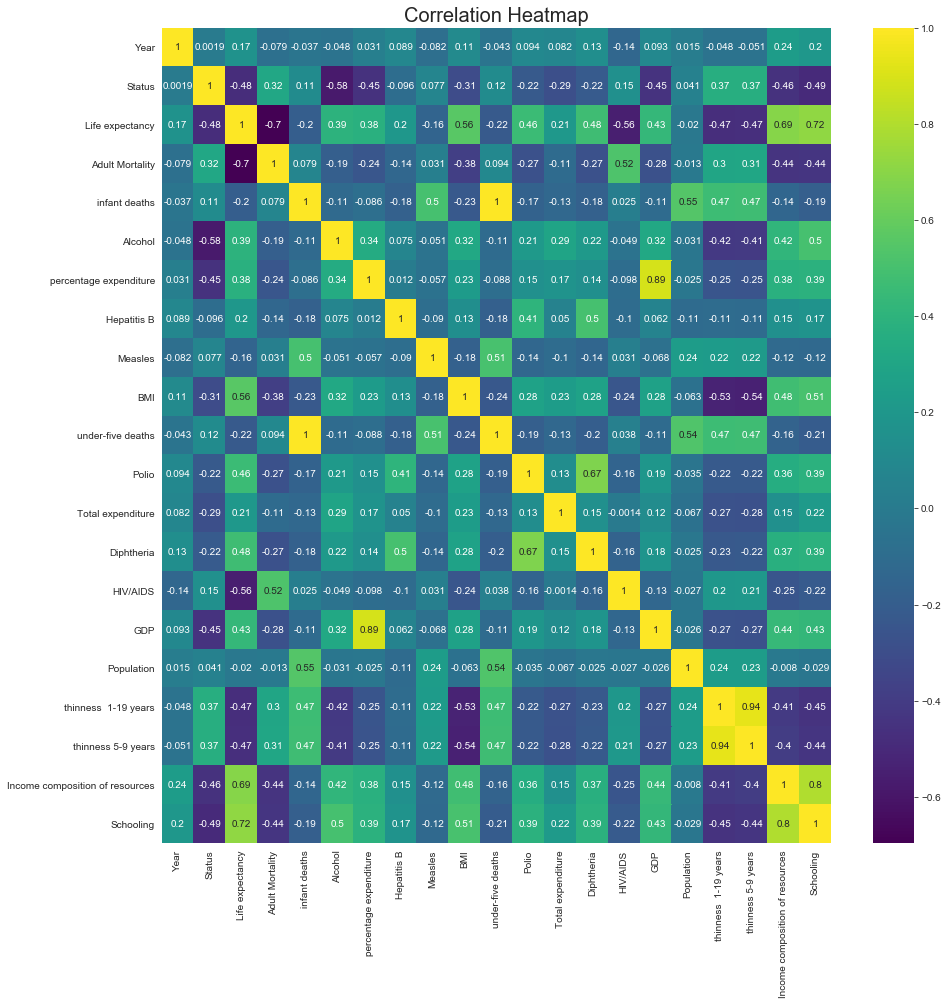

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Correlation Heatmap",fontsize=20)

Text(0.5, 1, 'Pairplot between variables')

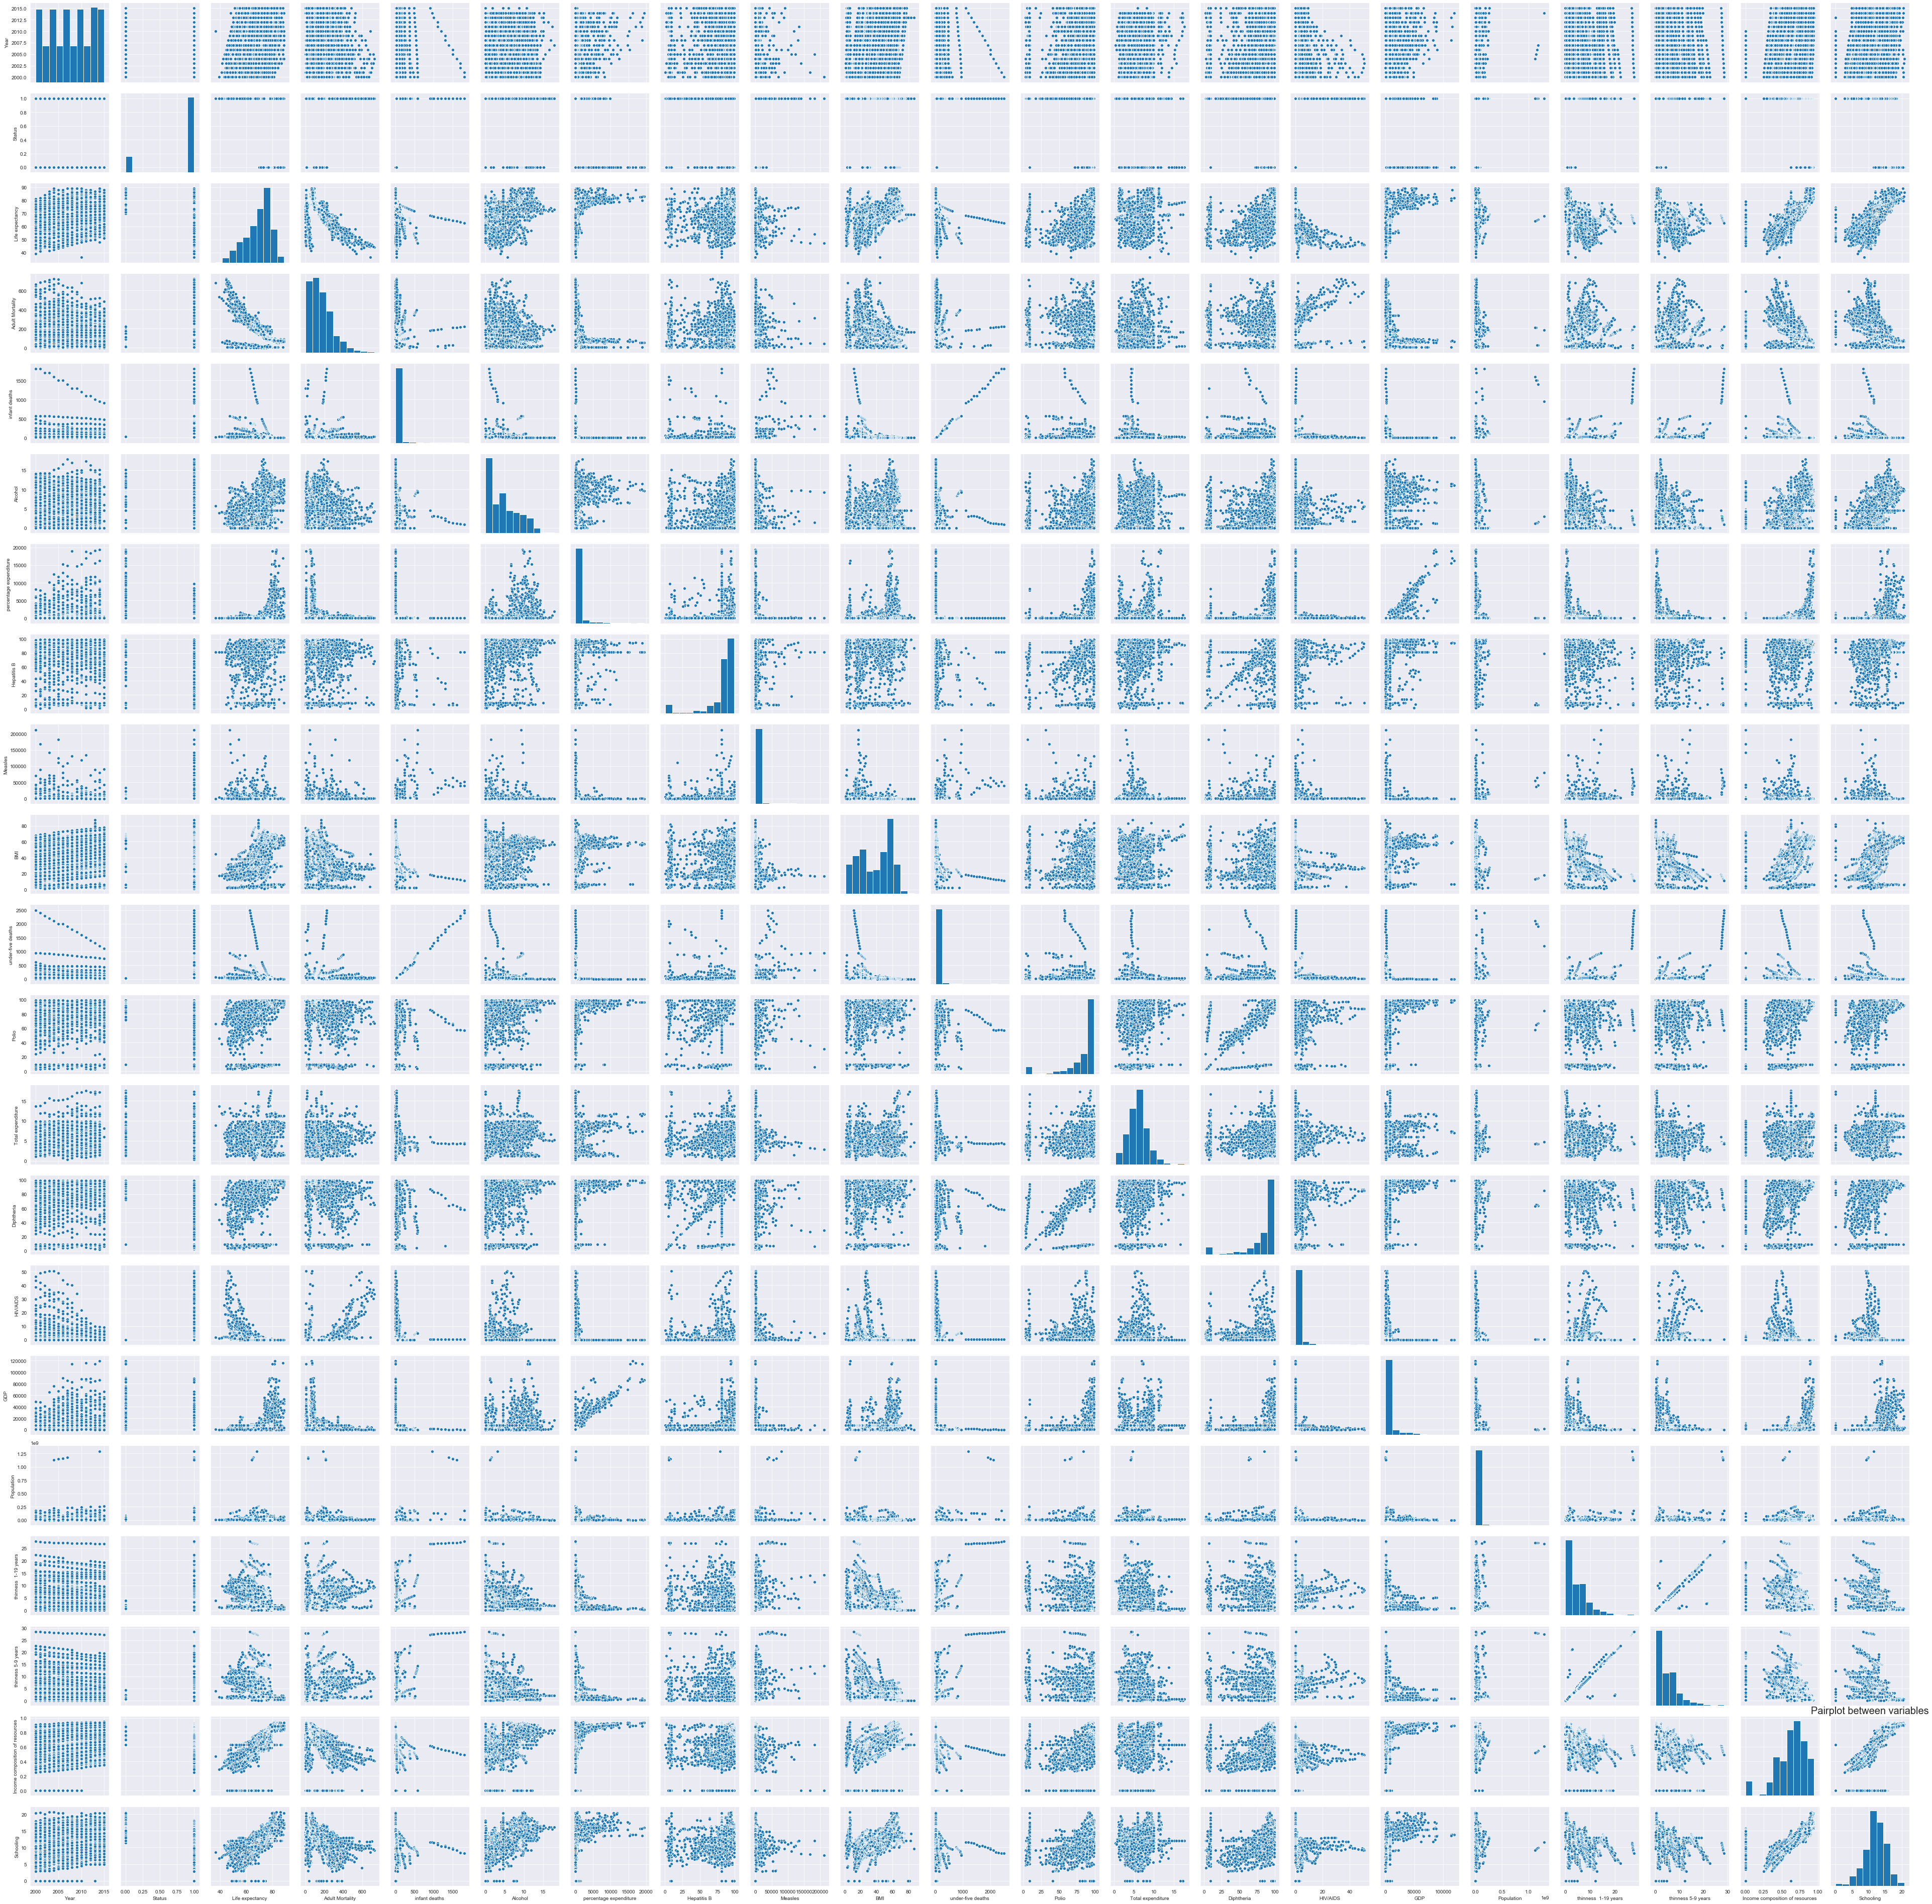

In [17]:
sns.pairplot(df)
plt.title("Pairplot between variables",fontsize=20)

Since few of the features are having a linear relationship with the y-variable, then __linear regression__ would be good approach.

__6) Model Building__

__Note__:- I am using __RFE(Recursive Feature Selection)__ in order to train the model

In [18]:
X=df.drop(["Life expectancy","Country"],axis=1)
y=df[["Life expectancy"]]

Here, I will be using train_test_split from sklearn.model_selection to divide the X and y data into training dataset and test dataset

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

Here, I am importing certain libraries for model building.

__statsmodel.api__=  __statsmodels__ is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

__RFE__=  __Recursive Feature Selection (RFE)__ is an efficient approach for eliminating features from a training dataset for feature selection.

__Linear Regression__=  __Linear regression__ is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

__VIF__=  __The Variance Inflation Factor (VIF)__ is a measure of colinearity among predictor variables within a multiple regression.

In [20]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

Here, I will be fitting the linear regression model in the X_train and y_train. After that I will be using RFE with column count of 15 and then fit it in X_train and y_train, 

In [21]:
#Running RFE with important column count to be 15
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)
rfe.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [22]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', False, 2),
 ('Status', True, 1),
 ('Adult Mortality', True, 1),
 ('infant deaths', True, 1),
 ('Alcohol', True, 1),
 ('percentage expenditure', False, 3),
 ('Hepatitis B', True, 1),
 ('Measles', False, 5),
 ('BMI', True, 1),
 ('under-five deaths', True, 1),
 ('Polio', True, 1),
 ('Total expenditure', True, 1),
 ('Diphtheria', True, 1),
 ('HIV/AIDS', True, 1),
 ('GDP', False, 4),
 ('Population', False, 6),
 ('thinness  1-19 years', True, 1),
 ('thinness 5-9 years', True, 1),
 ('Income composition of resources', True, 1),
 ('Schooling', True, 1)]

In [23]:
#selecting the important features in the count
imp_columns=X_train.columns[rfe.support_]
imp_columns

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [24]:
#creating X_train with RFE supported variables
X_train_rfe=X_train[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

__- High p-value, High VIF : Drop the variable__

__- High p-value, Low VIF  : Drop the variable with high p-value first__

__- Low p-value, Low VIF : accept the variable__

__Variance Inflation Factor (VIF)__, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

__STEP-1__

In [25]:
random.seed(0)

#adding a constant 
X_train_rfec=sm.add_constant(X_train_rfe)

#Build a model with RFE features
lm_rfe=sm.OLS(y_train,X_train_rfec).fit()

#summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     620.1
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:31   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2040   BIC:                         1.177e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [26]:
#creating a dataframe which contains all the feature variables and their respective VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

vif=vif.sort_values(by="VIF",ascending=False)
vif

Features         VIF
6                 under-five deaths  178.163045
2                     infant deaths  177.703600
14                        Schooling   44.589171
13  Income composition of resources   30.423795
9                        Diphtheria   30.308160
7                             Polio   26.279233
11             thinness  1-19 years   19.470381
12               thinness 5-9 years   19.305937
4                       Hepatitis B   18.996487
5                               BMI    8.283458
8                 Total expenditure    7.743429
0                            Status    7.133512
1                   Adult Mortality    4.424914
3                           Alcohol    4.348154
10                         HIV/AIDS    1.701433

Since the variable of __"thinness 5-9 years"__ has a __high p-value__, we remove the feature from the training dataset.

We will follow the same step until we get variables with a suitable VIF and suitable p-value.

Here, I am taking the measure of VIF to be 10, i.e.

If __VIF<=10__, we will accept the variable. 
If __VIF>10__, we will reject the variable.


__STEP-2__

In [27]:
#dropping the variable "thinness 5-9 years"

X_train_rfe1=X_train_rfe.drop(["thinness 5-9 years"],axis=1)

#adding a constant
X_train_rfec1=sm.add_constant(X_train_rfe1)

#Build a model with RFE features
lm_rfe1=sm.OLS(y_train,X_train_rfec1).fit()

#summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     664.7
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:31   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2041   BIC:                         1.176e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [28]:
#creating a dataframe which contains all the feature variables and their respective VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif["Features"]=X_train_rfe1.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]

vif=vif.sort_values(by="VIF",ascending=False)
vif

Features         VIF
6                 under-five deaths  177.820134
2                     infant deaths  177.156064
13                        Schooling   44.554703
12  Income composition of resources   30.419160
9                        Diphtheria   30.297224
7                             Polio   26.279230
4                       Hepatitis B   18.992528
5                               BMI    8.185364
8                 Total expenditure    7.735592
0                            Status    7.102032
1                   Adult Mortality    4.414141
3                           Alcohol    4.347760
11             thinness  1-19 years    4.072283
10                         HIV/AIDS    1.701197

Since, the variable __"under-five deaths"__ has a __high VIF score__, we eliminate it from the training dataset.

__STEP-3__

In [29]:
#dropping the variable "under-five deaths"

X_train_rfe2=X_train_rfe1.drop(["under-five deaths"],axis=1)

#adding a constant
X_train_rfec2=sm.add_constant(X_train_rfe2)

#Build a model with RFE features
lm_rfe2=sm.OLS(y_train,X_train_rfec2).fit()

#summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     675.4
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:32   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2042   BIC:                         1.185e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [30]:
#creating a dataframe which contains all the feature variables and their respective VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif["Features"]=X_train_rfe2.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]

vif=vif.sort_values(by="VIF",ascending=False)
vif

Features        VIF
12                        Schooling  44.532726
11  Income composition of resources  30.285606
8                        Diphtheria  29.798056
6                             Polio  26.222131
4                       Hepatitis B  18.756749
5                               BMI   8.185277
7                 Total expenditure   7.725807
0                            Status   7.063404
1                   Adult Mortality   4.377353
3                           Alcohol   4.232999
10             thinness  1-19 years   4.072272
9                          HIV/AIDS   1.694621
2                     infant deaths   1.474409

Since, the variable __"Alcohol"__ has a __high p-score__, we eliminate it from the training dataset.

__STEP-4__

In [31]:
#dropping the variable "Alcohol"

X_train_rfe3=X_train_rfe2.drop(["Alcohol"],axis=1)

#adding a constant
X_train_rfec3=sm.add_constant(X_train_rfe3)

#Build a model with RFE features
lm_rfe3=sm.OLS(y_train,X_train_rfec3).fit()

#summary of linear model
print(lm_rfe3.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     732.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:32   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2043   BIC:                         1.184e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [32]:
#creating a dataframe which contains all the feature variables and their respective VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif["Features"]=X_train_rfe3.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]

vif=vif.sort_values(by="VIF",ascending=False)
vif

Features        VIF
11                        Schooling  42.108985
10  Income composition of resources  30.279914
7                        Diphtheria  29.797738
5                             Polio  26.164786
3                       Hepatitis B  18.733928
4                               BMI   8.181539
6                 Total expenditure   7.492734
0                            Status   6.050528
1                   Adult Mortality   4.297729
9              thinness  1-19 years   3.957321
8                          HIV/AIDS   1.690447
2                     infant deaths   1.454689

Since, the variable __"Schooling"__ has a __high VIF score__, we eliminate it from the training dataset.

__STEP-5__

In [33]:
#dropping the variable "Schooling"

X_train_rfe4=X_train_rfe3.drop(["Schooling"],axis=1)

#adding a constant
X_train_rfec4=sm.add_constant(X_train_rfe4)

#Build a model with RFE features
lm_rfe4=sm.OLS(y_train,X_train_rfec4).fit()

#summary of linear model
print(lm_rfe4.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     716.7
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:32   Log-Likelihood:                -5961.9
No. Observations:                2056   AIC:                         1.195e+04
Df Residuals:                    2044   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [34]:
#creating a dataframe which contains all the feature variables and their respective VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif["Features"]=X_train_rfe4.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]

vif=vif.sort_values(by="VIF",ascending=False)
vif

Features        VIF
7                        Diphtheria  29.685351
5                             Polio  25.804967
3                       Hepatitis B  18.592741
10  Income composition of resources  13.903001
4                               BMI   7.832682
6                 Total expenditure   7.218022
0                            Status   6.050513
1                   Adult Mortality   4.295778
9              thinness  1-19 years   3.953007
8                          HIV/AIDS   1.686152
2                     infant deaths   1.454636

Since, the variable __"Diphtheria"__ has a __high VIF score__, we eliminate it from the training dataset.

__STEP-6__

In [35]:
#dropping the variable "Diphtheria"

X_train_rfe5=X_train_rfe4.drop(["Diphtheria"],axis=1)

#adding a constant
X_train_rfec5=sm.add_constant(X_train_rfe5)

#Build a model with RFE features
lm_rfe5=sm.OLS(y_train,X_train_rfec5).fit()

#summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     748.8
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:32   Log-Likelihood:                -6004.1
No. Observations:                2056   AIC:                         1.203e+04
Df Residuals:                    2045   BIC:                         1.209e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [36]:
#creating a dataframe which contains all the feature variables and their respective VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif["Features"]=X_train_rfe5.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]

vif=vif.sort_values(by="VIF",ascending=False)
vif

Features        VIF
5                            Polio  17.899389
3                      Hepatitis B  16.461752
9  Income composition of resources  13.416007
4                              BMI   7.816717
6                Total expenditure   7.124499
0                           Status   6.042463
1                  Adult Mortality   4.293522
8             thinness  1-19 years   3.951400
7                         HIV/AIDS   1.685954
2                    infant deaths   1.454002

Since, the variable __"Polio"__ has a __high VIF score__, we eliminate it from the training dataset.

__STEP-7__

In [37]:
#dropping the variable "Polio"

X_train_rfe6=X_train_rfe5.drop(["Polio"],axis=1)

#adding a constant
X_train_rfec6=sm.add_constant(X_train_rfe6)

#Build a model with RFE features
lm_rfe6=sm.OLS(y_train,X_train_rfec6).fit()

#summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     752.1
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:33   Log-Likelihood:                -6085.2
No. Observations:                2056   AIC:                         1.219e+04
Df Residuals:                    2046   BIC:                         1.225e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [38]:
#creating a dataframe which contains all the feature variables and their respective VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif["Features"]=X_train_rfe6.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]

vif=vif.sort_values(by="VIF",ascending=False)
vif

Features        VIF
3                      Hepatitis B  12.858160
8  Income composition of resources  11.807578
4                              BMI   7.704458
5                Total expenditure   6.936341
0                           Status   5.995705
1                  Adult Mortality   4.293495
7             thinness  1-19 years   3.920334
6                         HIV/AIDS   1.685888
2                    infant deaths   1.451203

Since, the variable __"Hepatitis B"__ has a __high VIF score__, we eliminate it from the training dataset.

__STEP-8__

In [39]:
#dropping the variable "Hepatitis B"

X_train_rfe7=X_train_rfe6.drop(["Hepatitis B"],axis=1)

#adding a constant
X_train_rfec7=sm.add_constant(X_train_rfe7)

#Build a model with RFE features
lm_rfe7=sm.OLS(y_train,X_train_rfec7).fit()

#summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     842.4
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:33   Log-Likelihood:                -6089.0
No. Observations:                2056   AIC:                         1.220e+04
Df Residuals:                    2047   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [40]:
#creating a dataframe which contains all the feature variables and their respective VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif["Features"]=X_train_rfe7.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]

vif=vif.sort_values(by="VIF",ascending=False)
vif

Features       VIF
7  Income composition of resources  9.622185
3                              BMI  7.489188
4                Total expenditure  6.529542
0                           Status  5.558442
1                  Adult Mortality  4.246529
6             thinness  1-19 years  3.750448
5                         HIV/AIDS  1.677025
2                    infant deaths  1.412369

With these steps, we have seen that the __VIF and p-value__ for these features are suitable and we can proceed with training the final model. 

In [41]:
X_train_final=X_train[X_train_rfe7.columns]

In [42]:
X_train_final=sm.add_constant(X_train_final)
lm_final=sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     842.4
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:33   Log-Likelihood:                -6089.0
No. Observations:                2056   AIC:                         1.220e+04
Df Residuals:                    2047   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

__7) Model Prediction and Evaluation__

In [43]:
X_test_final=X_test[X_train_rfe7.columns]
X_test_final=sm.add_constant(X_test_final)

actual=y_test["Life expectancy"]
prediction=lm_final.predict(X_test_final)

Here, we are importing mean absolute error and mean squared error in order to evaluate the model.

__MSE__=   __Mean Squared Error (MSE)__ of an estimator measures the average of the squares of the errors, i.e. the average squared difference between the estimated values and the actual value.

__MAE__= __Mean Absolute Error (MAE)__ is an arithmetic average of the absolute errors , which is the prediction and the actual value.

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
#Evaluation:-
#MSE
print(mean_squared_error(prediction,actual))

20.986053650379013


In [46]:
#Evaluation:-
#MAE
print(mean_absolute_error(prediction,actual))

3.286568058255766


Here, we will be evaulating the errors to check if there is no pattern between actual and predicted values.

Text(0.5, 1.0, 'Check for linearity')

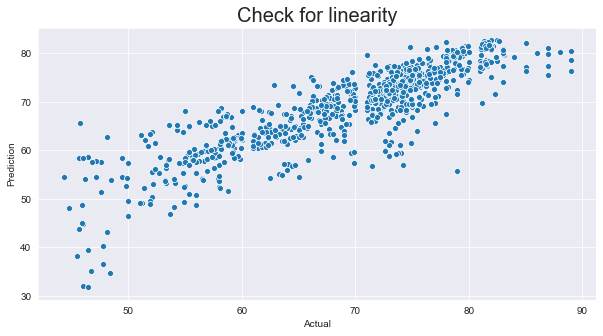

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test["Life expectancy"],prediction)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Check for linearity",fontsize=20)

Text(0.5, 0, 'Errors')

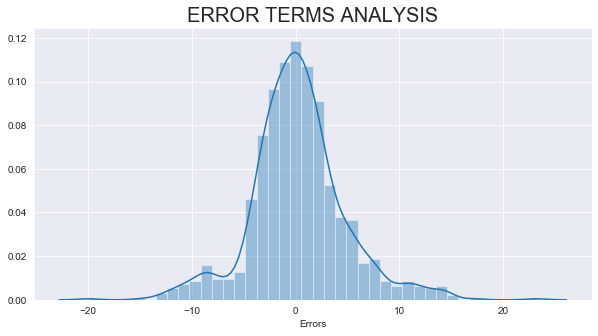

In [48]:
sns.set_style("darkgrid")
fig=plt.figure(figsize=(10,5))
sns.distplot((y_test["Life expectancy"]-prediction),bins=40)
plt.title("ERROR TERMS ANALYSIS",fontsize=20)
plt.xlabel("Errors")

Here, we can see that the model fulfills the basic assumption of linear regression,i.e.

- The Errors are normally distributed along 0.
- The Errors don't have a particular pattern between actual values and predicted values.
